# Explore CITE Data for the final project

The goal for this notebook is to introduce you to the CITE gene expression (GEX, also known as mRNA) and antibody derived tag **protein** (ADT) datasets. 

Note, this data is present to facilitate exploration of the dataset for the final project. 

Install the conda in hpcc (vis terminal) or linux systerm:

curl -O  https://repo.anaconda.com/archive/Anaconda3-2023.03-Linux-x86_64.sh

then 

bash Anaconda3-2023.03-Linux-x86_64.sh

Details is in https://docs.icer.msu.edu/Using_conda/


In [1]:
import numpy as np
import pandas as pd
import logging
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)



logging.basicConfig(level=logging.INFO)

0.9.1


In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

The data is stored in two AnnData objects, one for each modality. Full documentation for AnnData is [here](https://anndata.readthedocs.io/en/latest/). 

Let's load the cite data.

In [4]:
adata_gex = ad.read_h5ad("Gex_processed_training.h5ad") #gex is gene expression which are RNA
adata_adt = ad.read_h5ad("Adt_processed_training.h5ad") # adt is protein

In [5]:
# We see that AnnData provides a representation with summary stastics of the data The initial data we passed 
# are accessible as a sparse matrix using adata.X.
adata_adt.X    # there is 66,175 cells, and 134 proteins

<42123x134 sparse matrix of type '<class 'numpy.float64'>'
	with 4658030 stored elements in Compressed Sparse Column format>

In [6]:
# We can check the names of the cells
adata_adt.obs_names

Index(['GCATTAGCATAAGCGG-1-s1d1', 'TACAGGTGTTAGAGTA-1-s1d1',
       'AGGATCTAGGTCTACT-1-s1d1', 'GTAGAAAGTGACACAG-1-s1d1',
       'TCCGAAAAGGATCATA-1-s1d1', 'CTCCCAATCCATTGGA-1-s1d1',
       'GACCAATCAATTTCGG-1-s1d1', 'TTCCGGTAGTTGTAAG-1-s1d1',
       'ACCTGTCAGGACTGGT-1-s1d1', 'TTCGATTTCAGGACAG-1-s1d1',
       ...
       'GATCACACAGAAATTG-1-s3d6', 'AGGGTGACAAATCGGG-1-s3d6',
       'TCAGGGCGTGCACGCT-1-s3d6', 'CCCTGATTCAGTCACA-1-s3d6',
       'ACTATTCGTATTCCTT-1-s3d6', 'TGTCCCAGTTAACAGA-1-s3d6',
       'AATTCCTTCCTAGCCT-1-s3d6', 'CTCAAGAAGATCGCCC-1-s3d6',
       'TTGCCTGTCCCATACC-1-s3d6', 'AGAACAATCCATTGCC-1-s3d6'],
      dtype='object', length=42123)

In [7]:
# The names of proteins
adata_adt.var_names

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', length=134)

In [8]:
# There are two type of data available. 1) is raw data which is counts
A = adata_adt.layers['counts']
A.toarray()  # you can see all the data is counts

array([[  1.,   1.,  16., ...,   1.,   9.,   5.],
       [ 55.,   7.,  38., ..., 146.,  24., 131.],
       [  0.,   2.,  23., ...,   0.,   9.,   4.],
       ...,
       [  2.,   2.,   7., ...,   6.,  22.,   9.],
       [  3.,   2.,   3., ...,   3.,  18.,   6.],
       [  1.,   1.,   7., ...,   1.,   4.,   3.]])

In [9]:
A1 = adata_adt.X
A1.toarray()  # this is normalized data

array([[0.15437832, 0.15437832, 1.30044138, ..., 0.15437832, 0.91724646,
        0.60685992],
       [1.24113739, 0.27233985, 0.99300092, ..., 2.01875925, 0.72912055,
        1.92544377],
       [0.        , 0.22376126, 1.35683525, ..., 0.        , 0.75540608,
        0.40649441],
       ...,
       [0.34508872, 0.34508872, 0.89298248, ..., 0.80484313, 1.71077847,
        1.04890311],
       [0.67508709, 0.49640375, 0.67508709, ..., 0.67508709, 1.91474736,
        1.07445896],
       [0.24185085, 0.24185085, 1.06994855, ..., 0.24185085, 0.73927516,
        0.59928292]])

In [10]:
print('normalized =', A1[1,1], '; Counts =', A[1, 1])

normalized = 0.2723398506641388 ; Counts = 7.0


In [11]:
# Let's check the RNA. Raw data (count)
B = adata_gex.layers['counts']
B.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

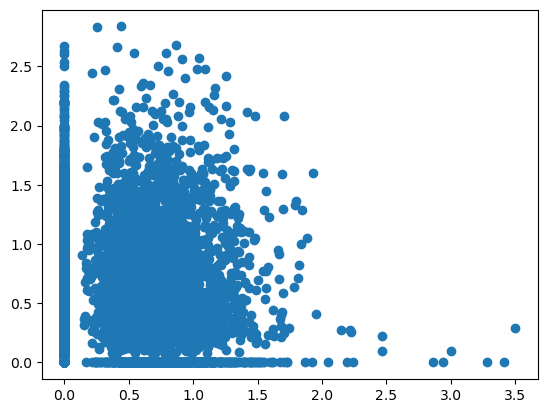

In [12]:
A =adata_gex[:, ['CD86']].X
CD86_RNA = A.toarray()
A1 = adata_adt[:, ['CD86']].X
CD86_Protein = A1.toarray()
plt.scatter(CD86_RNA, CD86_Protein)

As expected, the linear model does better than the dummy method. Now the challenge is up to you! Can you do better than this baseline?

In [15]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(CD86_RNA, CD86_Protein)

LinearRegression()

In [25]:
model.predict([[0]])

array([[0.19593767]])

In [30]:
question = model.predict(CD86_RNA)

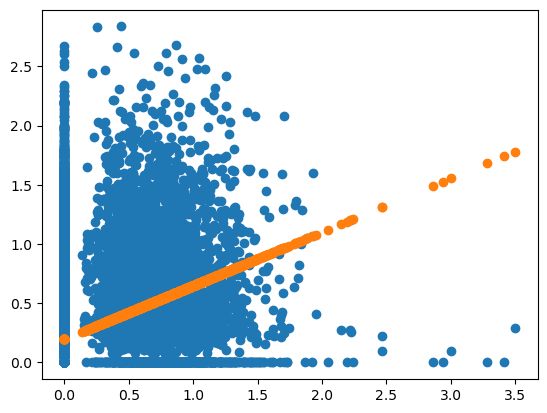

In [31]:
plt.scatter(CD86_RNA, CD86_Protein)
plt.scatter(CD86_RNA, question)